# CCI analysis in niches
## 1. Find interest ligand receptor pairs in Cellular microenvironment(niches).

In [2]:
import sys
sys.path.insert(0,'/DATA/User/zuolulu/spateo-release')
sys.path.insert(0,'/DATA/User/zuolulu/dynamo-release')
import spateo as st
import dynamo as dyn
import scanpy as sc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import anndata as ad
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

2022-10-24 15:27:04.220130: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-24 15:27:04.225980: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/zuolulu/miniconda3/envs/spateo/lib/python3.8/site-packages/opencv_python-4.5.5.64-py3.8-linux-x86_64.egg/cv2/../../lib64:
2022-10-24 15:27:04.225995: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/zuolulu/miniconda3/envs/spateo/lib/python3.8/site-packages/spaghetti-1.6.5-py3.8.egg/spaghetti/network.py:36: FutureWarning:

The next major release of pysal/spaghett

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


# Load data (axolotl data)

In [3]:
os.chdir('/DATA/User/zuolulu/06.axolotl/')
os.getcwd()

'/DATA/User/zuolulu/06.axolotl'

In [4]:
adata = ad.read("/DATA/User/zuolulu/06.axolotl/data/2DPI_1.h5ad")
adata

AnnData object with n_obs × n_vars = 7668 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', 'Injury_2DPI_rep1_SS200000147BL_D5', '__type', 'angle_dict'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [6]:
color_key={'CCKIN': '#99cfdd',
 'CMPN': '#ccc8fb',
 'CP': '#666666',
 'dpEX': '#fffe2e',
 'IMN': '#95c454',
 'MCG': '#04047d',
 'mpEX': '#4ec602',
 'MPIN': '#1c9d79',
 'MSN': '#775613',
 'nptxEX': '#b904ab',
 'NPYIN': '#b58396',
 'NTNG1EX': '#fe3030',
 'OBNBL': '#02ffff',
 'OLIGO': '#AF5F3C',
 'reaEGC': '#e72988',
 'ribEGC': '#8eb3fb',
 'rIPC1': '#4166b0',
 'rIPC2': '#59BE86',
 'rIPC3': '#ffd29a',
 'rIPC4': '#C798EE',
 'SCGNIN': '#e9c62a',
 'sfrpEGC': '#767da3',
 'SSTIN': '#525510',
 'TLNBL': '#4fbad6',
 'UnKnown': '#D1D1D1',
 'VLMC': '#FEB915',
 'wntEGC': '#828282',
 'WSN': '#6D1A9C'}

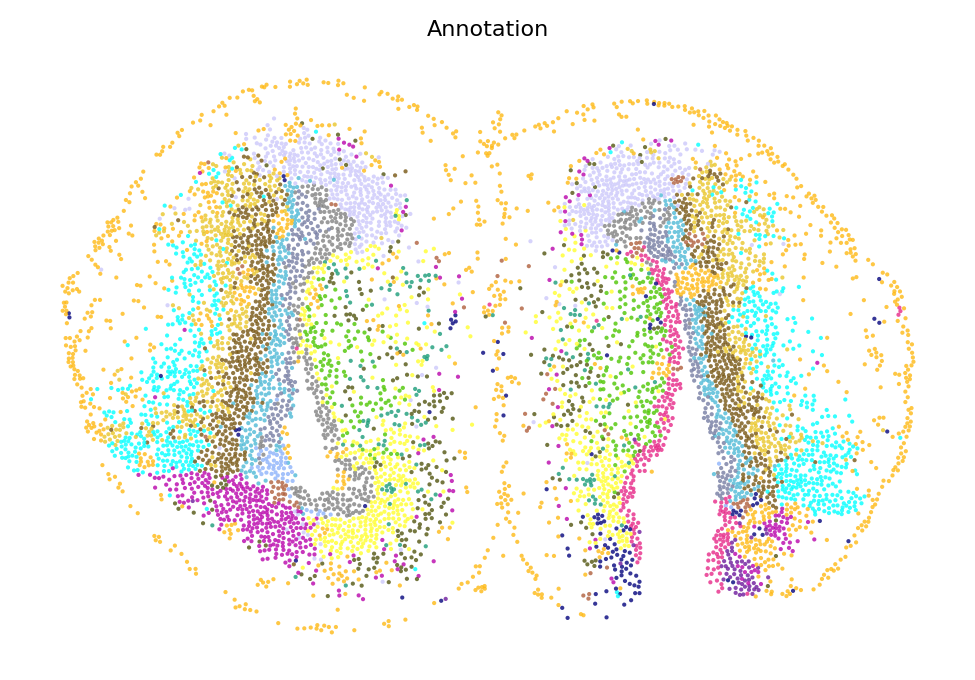

In [7]:
fig, ax = plt.subplots()
st.pl.space(adata, color=['Annotation'], pointsize=0.05,color_key=color_key,show_legend=False,ax=ax)
fig.subplots_adjust(right=0.7)
plt.rcParams['pdf.fonttype'] = 42
fig.set_size_inches(3,3)
#fig.savefig("2DPI.cluster.anno.pdf")

# 1. Find interest ligand receptor pairs in Cellular microenvironment(niches).

In [8]:
dyn.tl.neighbors(adata, X_data=adata.obsm['spatial'] ,n_neighbors=10, basis='pca', result_prefix="spatial")

|-----> Start computing neighbor graph...
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----> <insert> spatial_connectivities to obsp in AnnData Object.
|-----> <insert> spatial_distances to obsp in AnnData Object.
|-----> <insert> spatial_neighbors to uns in AnnData Object.
|-----> <insert> spatial_neighbors.indices to uns in AnnData Object.
|-----> <insert> spatial_neighbors.params to uns in AnnData Object.


AnnData object with n_obs × n_vars = 7668 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', 'Injury_2DPI_rep1_SS200000147BL_D5', '__type', 'angle_dict', 'spatial_neighbors'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [9]:
# cell_co,,unication modify path
path = '/DATA/User/zuolulu/spateo-release/spateo/tools/database/'
adata_n2n = st.tl.niches(adata,path=path,layer=None,species='axolotl',system='niches_n2n',method='sum')

In [10]:
adata_n2n

AnnData object with n_obs × n_vars = 7668 × 916
    obs: 'cell_pair_name'

In [15]:
adata

AnnData object with n_obs × n_vars = 7668 × 27324
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation'
    var: 'Axolotl_ID', 'hs_gene'
    uns: 'Annotation_colors', 'Injury_2DPI_rep1_SS200000147BL_D5', '__type', 'angle_dict', 'spatial_neighbors'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [16]:
adata_n2n.uns['__type'] = 'UMI'
adata_n2n.obs['cell_pair_name'] = adata.obs_names.tolist()
adata_n2n.obsm['spatial'] = adata.obsm['spatial']
adata_n2n.obs.index = adata.obs.index
adata_n2n.obs['seurat_clusters'] = adata.obs['seurat_clusters']
adata_n2n.obs['Annotation'] = adata.obs['Annotation']

In [17]:
adata = adata_n2n
adata

AnnData object with n_obs × n_vars = 7668 × 916
    obs: 'cell_pair_name', 'seurat_clusters', 'Annotation'
    uns: '__type'
    obsm: 'spatial'

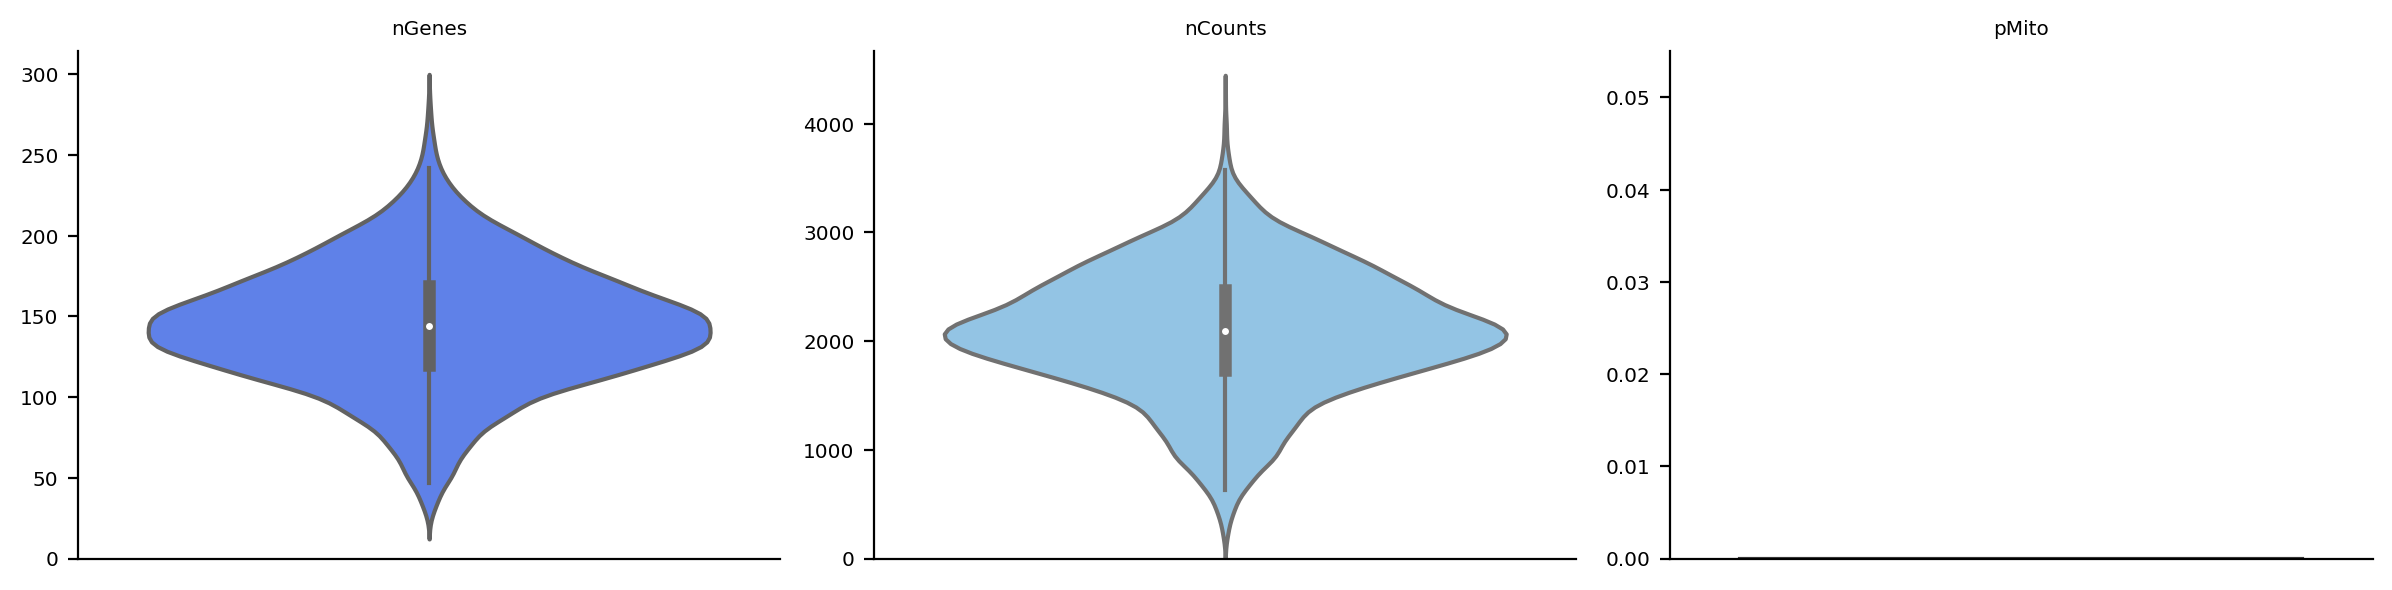

|-----> rounding expression data of layer: X during size factor calculation
|-----> size factor normalize following layers: ['X']
|-----> applying <ufunc 'log1p'> to layer<X>
|-----> set adata <X> to normalized data.
|-----> <insert> pp.norm_method to uns in AnnData Object.


AnnData object with n_obs × n_vars = 7668 × 916
    obs: 'cell_pair_name', 'seurat_clusters', 'Annotation', 'n_counts', 'nGenes', 'nCounts', 'pMito', 'Size_Factor', 'initial_cell_size'
    var: 'nCells', 'nCounts'
    uns: '__type', 'pp'
    obsm: 'spatial', 'pearson_residuals'
    layers: 'raw', 'norm_log1p'

In [18]:
#preprocessing
adata.obs['n_counts'] = adata.X.sum(axis=1).A1
adata.uns["pp"] = {}
adata.var_names_make_unique()
dyn.pl.basic_stats(adata)
#adata = filter_mt_and_other_genes(adata, ['mt-', 'Rps', 'Rpl', 'Gm42418'])
#st.pp.filter.filter_genes(adata, min_cells=50, inplace=True)
#st.pp.filter.filter_cells(adata, min_expr_genes=200, max_expr_genes=1500, inplace=True)
adata.layers['raw'] = adata.X
dyn.pp.normalize_cell_expr_by_size_factors(adata, layers="X")
adata.layers['norm_log1p'] = adata.X.copy()
adata.X = adata.layers['raw'].copy()
st.tl.pearson_residuals(adata, n_top_genes=None)
adata

In [19]:
bad_genes = np.isnan(adata.obsm["pearson_residuals"].sum(0))
bad_genes.sum()
st.tl.pca_spateo(adata=adata, X_data=adata.obsm["pearson_residuals"][:, ~bad_genes], n_pca_components=30, pca_key="X_pca", random_state=1)
dyn.tl.neighbors(adata, n_neighbors=30)

|-----> Runing PCA on user provided data...
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.


AnnData object with n_obs × n_vars = 7668 × 916
    obs: 'cell_pair_name', 'seurat_clusters', 'Annotation', 'n_counts', 'nGenes', 'nCounts', 'pMito', 'Size_Factor', 'initial_cell_size'
    var: 'nCells', 'nCounts'
    uns: '__type', 'pp', 'neighbors'
    obsm: 'spatial', 'pearson_residuals', 'X_pca'
    layers: 'raw', 'norm_log1p'
    obsp: 'distances', 'connectivities'

|-----> accessing adj_matrix_key=distances built from args for clustering...
|-----> Detecting communities on graph...
|-----------> Converting graph_sparse_matrix to networkx object
|-----> [Community clustering with louvain] in progress: 100.0000%
|-----> [Community clustering with louvain] finished [1367.7061s]


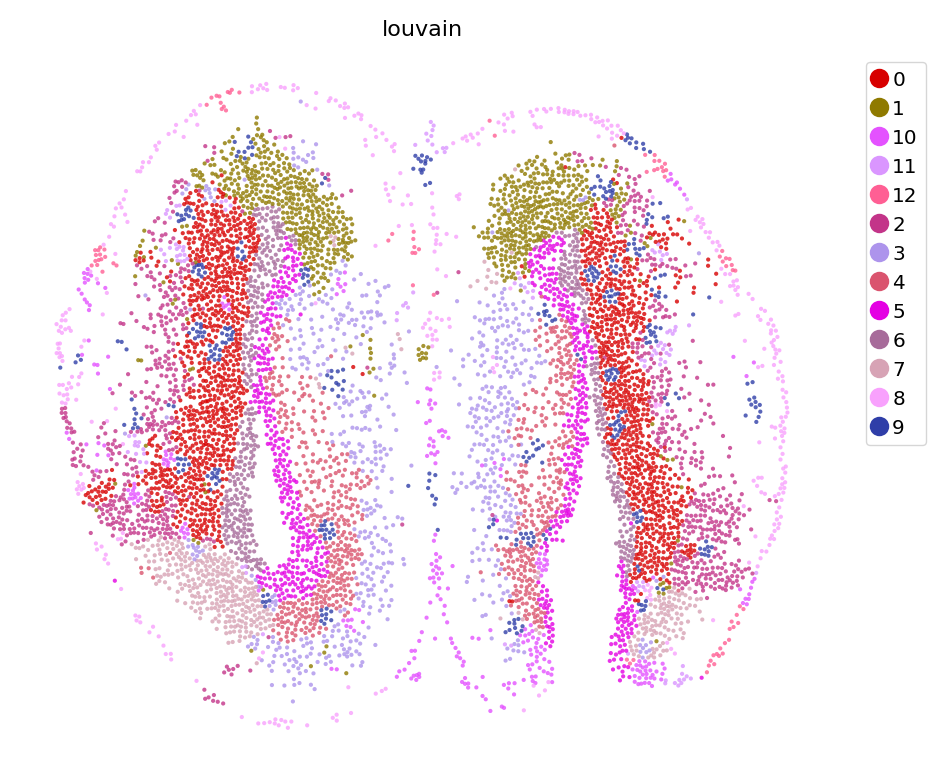

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [55.5612s]


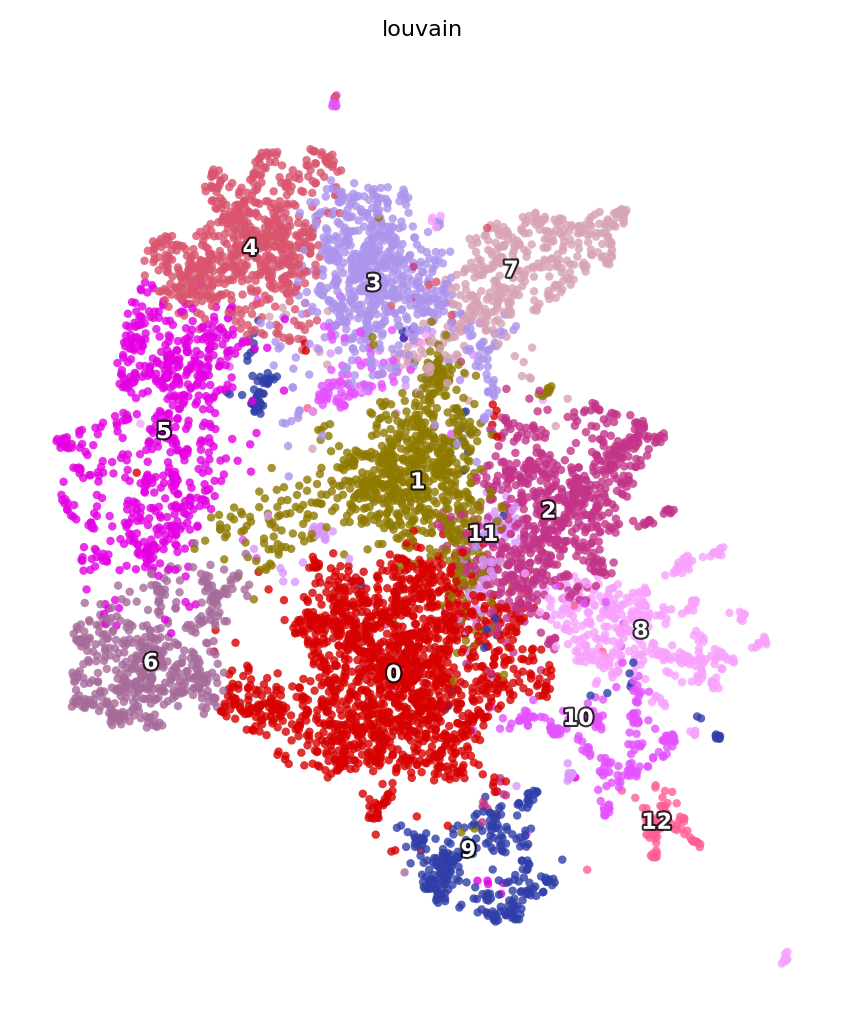

In [20]:
#louvain clustering
dyn.tl.louvain(adata, resolution=1) # 0.8
st.pl.space(adata, color=['louvain'], pointsize=0.05, show_legend="upper left")
dyn.tl.reduceDimension(adata)
st.pl.space(adata, color=['louvain'], space="umap", pointsize=0.2)

In [21]:
adata

AnnData object with n_obs × n_vars = 7668 × 916
    obs: 'cell_pair_name', 'seurat_clusters', 'Annotation', 'n_counts', 'nGenes', 'nCounts', 'pMito', 'Size_Factor', 'initial_cell_size', 'louvain'
    var: 'nCells', 'nCounts'
    uns: '__type', 'pp', 'neighbors', 'louvain', 'louvain_colors', 'umap_fit'
    obsm: 'spatial', 'pearson_residuals', 'X_pca', 'X_spatial', 'X_umap'
    layers: 'raw', 'norm_log1p'
    obsp: 'distances', 'connectivities'

In [22]:
adata_n2c_marker = st.tl.find_all_cluster_degs(adata,group='louvain',genes=None,n_jobs=1)

identifying top markers for each group: 916it [00:06, 147.12it/s]
identifying top markers for each group: 916it [00:05, 155.68it/s]
identifying top markers for each group: 916it [00:06, 141.63it/s]
identifying top markers for each group: 916it [00:05, 154.68it/s]
identifying top markers for each group: 916it [00:06, 145.67it/s]
identifying top markers for each group: 916it [00:05, 173.70it/s]
identifying top markers for each group: 916it [00:11, 77.99it/s] 
identifying top markers for each group: 916it [00:15, 59.82it/s] 
identifying top markers for each group: 916it [00:17, 52.74it/s]
identifying top markers for each group: 916it [00:07, 127.85it/s]
identifying top markers for each group: 916it [00:05, 167.23it/s]
identifying top markers for each group: 916it [00:04, 202.38it/s]
identifying top markers for each group: 916it [00:05, 164.39it/s]


In [23]:
## top_n_markers
deg_table = st.tl.top_n_degs(adata_n2c_marker,group='louvain',only_deg_list = False,sort_by='cosine_score',top_n_genes=10)
#deg_table.to_csv("slice_"+slice+"_"+system+"_deg.csv")
marker_genes_dict = st.tl.top_n_degs(adata_n2c_marker,group='louvain',top_n_genes=5)
marker_genes_dict

{'0': ['AMEX60DD039745-AMEX60DD053102',
  'AMEX60DD009927-AMEX60DD053102',
  'AMEX60DD009927-AMEX60DD053254',
  'AMEX60DD024186-AMEX60DD053102',
  'AMEX60DD023726-AMEX60DD027709'],
 '1': ['AMEX60DD013025-AMEX60DD001552',
  'AMEX60DD003175-AMEX60DD029326',
  'AMEX60DD009962-AMEX60DD011291',
  'AMEX60DD028973-AMEX60DD055954',
  'AMEX60DD009962-AMEX60DD025260'],
 '10': ['AMEX60DD009937-AMEX60DD004228',
  'AMEX60DD022398-AMEX60DD004228',
  'AMEX60DD055420-AMEX60DD022164',
  'AMEX60DD035913-AMEX60DD056087',
  'AMEX60DD049488-AMEX60DD029732'],
 '11': ['AMEX60DD003392-AMEX60DD037922',
  'AMEX60DD017034-AMEX60DD020036',
  'AMEX60DD054218-AMEX60DD037922',
  'AMEX60DD011821-AMEX60DD001573',
  'AMEX60DD003392-AMEX60DD029106'],
 '12': ['AMEX60DD003755-AMEX60DD009754',
  'AMEX60DD055420-AMEX60DD009754',
  'AMEX60DD024053-AMEX60DD009754',
  'AMEX60DD050385-AMEX60DD030862',
  'AMEX60DD022398-AMEX60DD009754'],
 '2': ['AMEX60DD051219-AMEX60DD018046',
  'AMEX60DDU001005418-AMEX60DD055040',
  'AMEX60DD02

In [24]:
deg_table = st.tl.top_n_degs(adata_n2c_marker,group='louvain',only_deg_list = False,sort_by='cosine_score',top_n_genes=5)

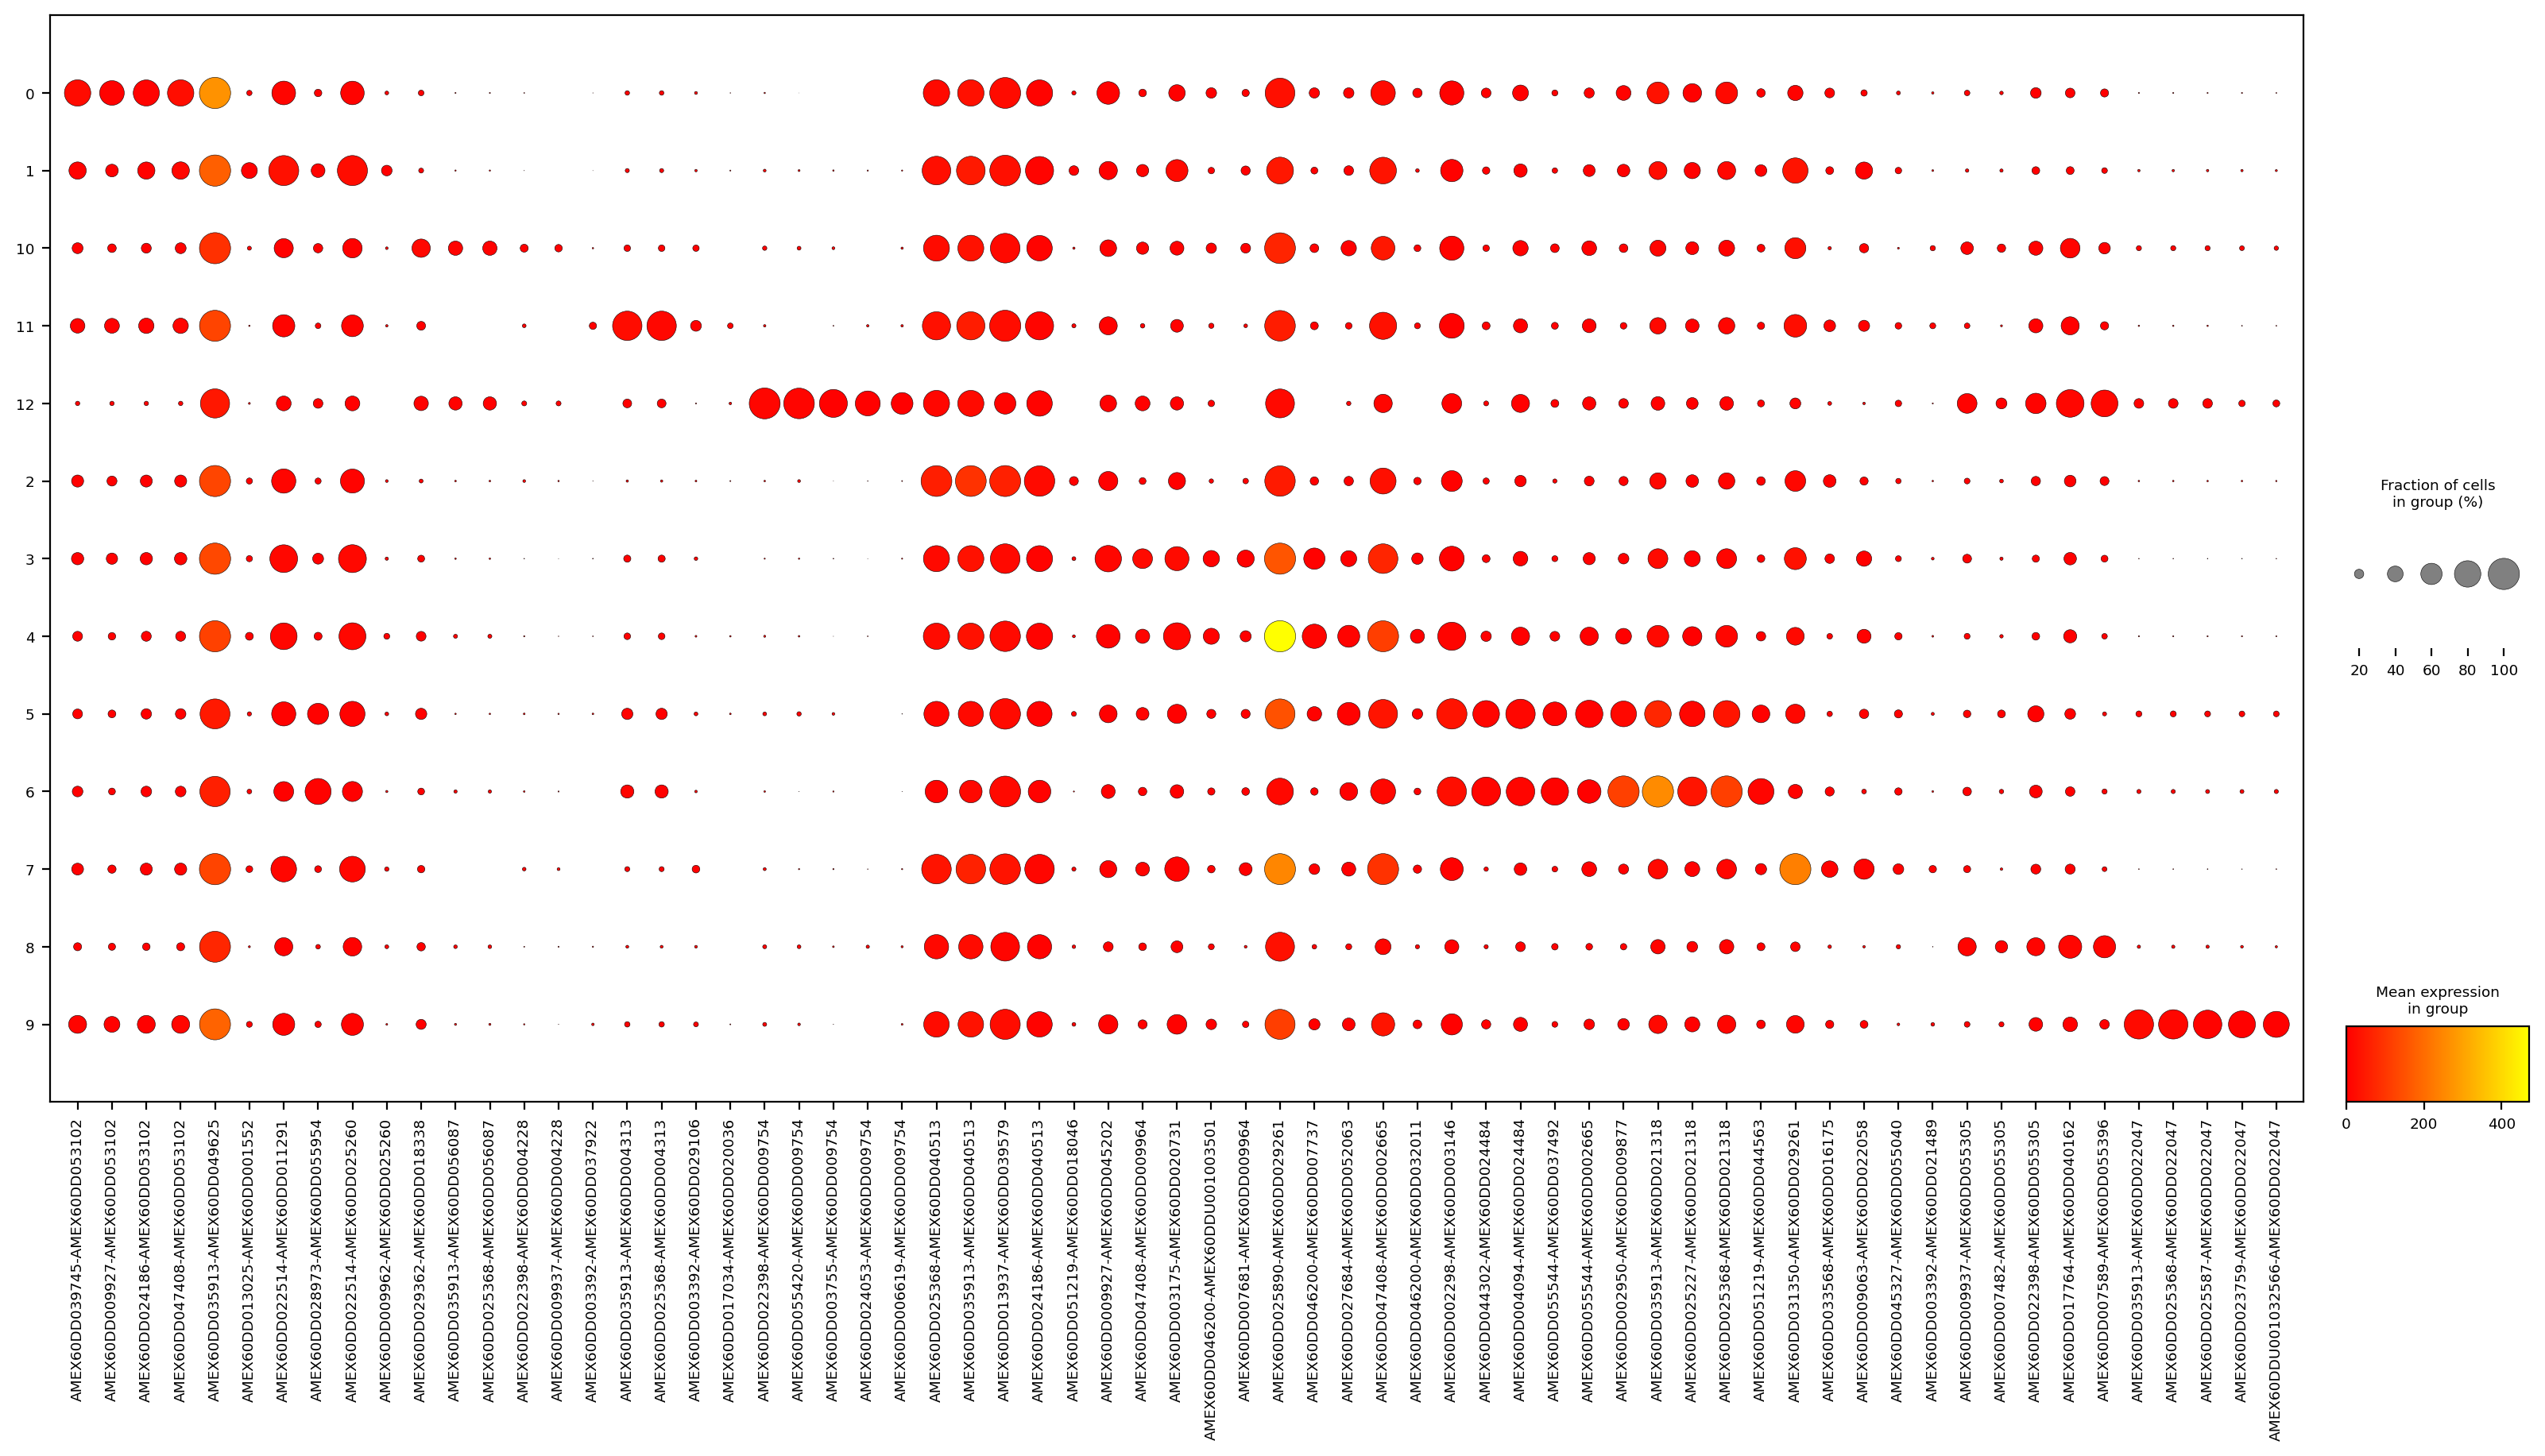

In [25]:
markers = deg_table['gene'].unique().tolist()
adata.var_names_make_unique()
adata.obs['louvain'] = adata.obs['louvain'].astype('category')
sc.pl.dotplot(adata,var_names=markers,groupby='louvain',cmap='autumn',figsize=(20,9))